## Exercise 3

In [78]:
import pandas as pd

In [79]:
file_path = '/Users/lele/Desktop/CPSC 4800/train.csv'

In [80]:
train = pd.read_csv(file_path)
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Exploratory Data Analysis

In [81]:
# Get the number of observations (rows)
num_observations = train.shape[0]

# Get the number of variables (columns)
num_variables = train.shape[1]

In [82]:
num_observations

1460

In [83]:
num_variables

81

* The data set train.csv contains 1460 observations and 81 variables.

---
### For the correlation test in this study, the following variables have been selected:

* SalePrice : Sale Price
* LotArea: Lot Size in square feet
* YearBuilt: Original construction date
* GrLivArea: Above grade (ground) living area square feet
* GarageArea: Garage Area in square feet
* TotalBsmtSF: Total square feet of basement area

---

### To see if there is any correlation between them, we are going to perform a Scatter Plot and a Pearson Correlation Test to see association between the variables.

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Analysis of the relationship between Sale Price and Lot Area

In [85]:
# Summary statistics for Sale Price and Lot Area
summary_stats = train[['SalePrice', 'LotArea']].describe()
summary_stats


,SalePrice,LotArea
count,1460.000000,1460.000000
mean,180921.195890,10516.828082
std,79442.502883,9981.264932
min,34900.000000,1300.000000
25%,129975.000000,7553.500000
50%,163000.000000,9478.500000
75%,214000.000000,11601.500000
max,755000.000000,215245.000000


### Distribution of Sale Price

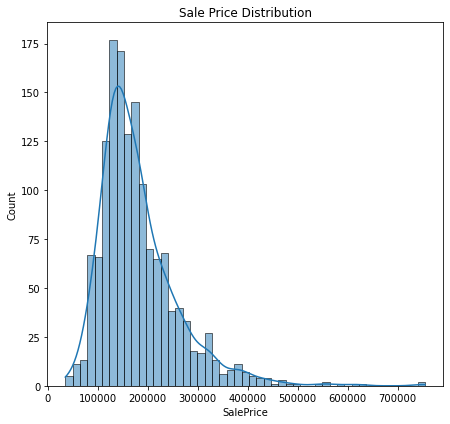

In [86]:
# Histogram for Sale Price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

plt.tight_layout()
plt.show()


### Sale Price Distribution Analysis:

* **Majority of Lower-Priced Homes:** Most of the data points are concentrated towards the lower end of sale prices. This suggests that a larger proportion of the properties have lower sale prices.

* **Few High-Priced Homes:** There are relatively fewer properties with very high sale prices, and these data points are spread out towards the right tail of the distribution.

* **Long Right Tail:** The histogram's tail on the right side is longer and thinner, indicating that there are a few extreme values (very high sale prices) that extend far from the main concentration of data.

* **Positive Skewness:** The skewness value (a measure of the asymmetry of the distribution) is positive, indicating a right skew. Positive skewness suggests that the mean is greater than the median, and the distribution is stretched to the right.

* **Potential Outliers:** The right-skewed distribution may contain potential outliers, which are the high-priced properties that are distant from the main cluster of data.

### Distribution of Lot Area

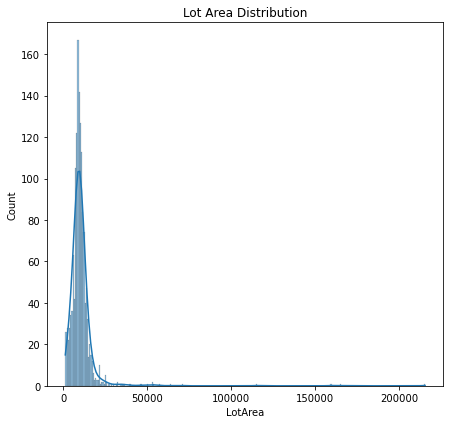

In [87]:
# Histogram for Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(train['LotArea'], kde=True)
plt.title('Lot Area Distribution')

plt.tight_layout()
plt.show()

### Lot Area Distribution Analysis
* **Slight Positive Skewness:** The histogram's shape is slightly right-skewed, indicating that the majority of the data points are clustered towards the lower end of lot areas. However, this skewness is not very pronounced, and there is a somewhat more even distribution of lot areas compared to a strongly right-skewed distribution.

* **Mean and Median Relationship:** The fact that the median is very close to, but slightly less than, the mean suggests that the skewness is not extreme. In a perfectly symmetric distribution, the mean and median are equal. When the median is slightly less than the mean, it indicates a small degree of right skew, but not to the extent where the mean is significantly pulled to the right by a few extreme values.

* **Spread of Lot Areas:** The spread of lot areas is somewhat balanced, with a slight tendency for larger lot areas. This means that while there are properties with larger lot areas, they are not significantly outnumbered by smaller lot areas.

* **Potential Outliers:** There may be a few properties with very large lot areas, but their impact on the mean is not substantial, given that the median is close to the mean.

## Scatter Plot

### Correlation between Sale Price and Lot Area

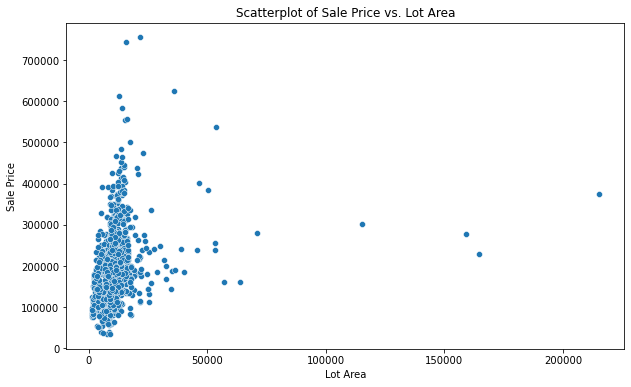

In [88]:
# Scatterplot of SalePrice vs. LotArea
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='LotArea', y='SalePrice', data=train)

# Add labels and title
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Lot Area')
plt.show()


In [89]:
# Calculate the Pearson correlation coefficient between "Sale Price" and "Lot Area"
correlation = train['SalePrice'].corr(train['LotArea'])
correlation

0.26384335387140556

---
### Interpretation:

#### There is a positive correlation coefficient of 0.263 which indicates that as "Lot Area" increases, "Sale Price" tends to increase, but the relationship is relatively weak
---

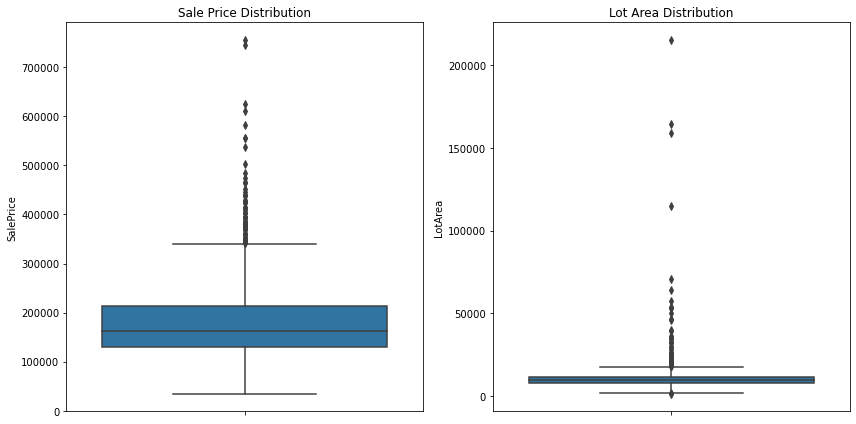

In [90]:
# Box plots for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['LotArea'])
plt.title('Lot Area Distribution')

plt.tight_layout()
plt.show()

### The distribution of sale prices is right-skewed, as indicated by the following observations:

* The mean (180,921.20) is greater than the median (50th percentile or 163,000.00).
* The 25th percentile (129,975.00) is closer to the median than the 75th percentile (214,000.00), which is characteristic of right-skewed distribution.
* The presence of several outliers on the right side of the distribution contributes to the right-skewness.
* There is a wide range in sale prices, as suggested by the large standard deviation (79,442.50). This indicates that sale prices vary considerably.
* The minimum sale price is 34,900.00, the maximum is 755,000.00, and there are several values that exceed the upper quartile value (outliers).

### Lot Area:

* Slight Right Skewness:

* The distribution of lot areas is slightly right-skewed, as indicated by the mean (10,516.83) being slightly greater than the median (50th percentile or 9,478.50).
* The presence of outliers on both the right and left sides of the distribution contributes to the slight right-skewness.

#### Central Tendency:

* The median is 9,478.50, which suggests that about half of the lot areas fall below this value and half above.
The mean (average) is slightly higher, indicating that the distribution is pulled to the right by the presence of larger lot areas.
Variability:

* The standard deviation (9,981.26) is relatively large, suggesting that the lot areas vary considerably.
Range of Lot Areas:

* The minimum lot area is 1,300 square feet, and the maximum is 215,245 square feet, indicating a wide range of lot sizes in the dataset.
Outliers:

* The presence of outliers on both sides of the distribution indicates that there are properties with very small lot areas (outliers to the left) and properties with very large lot areas (outliers to the right).

#### Interpreting the Outliers:

* Outliers to the right may represent properties with exceptionally large lots, while outliers to the left may represent properties with very small lots.

### Conclusion:

In summary, both variables, "Sale Price" and "Lot Area," exhibit right-skewed distributions with the majority of data concentrated towards the lower end. However, the degree of skewness varies, with "Sale Price" showing a more pronounced right-skew and a wider range of values. Both variables also have outliers that contribute to their respective skewness and suggest the presence of properties with both small and large values. 

**The association between both variables are not strong as is described in the Scatterplot and the Correlation Coefficient.**

## 2) Analysis of the relationship between Sale Price and Year Built

In [91]:
# Summary statistics for Sale Price and Year Built
summary_stats = train[['SalePrice', 'YearBuilt']].describe()
summary_stats

,SalePrice,YearBuilt
count,1460.000000,1460.000000
mean,180921.195890,1971.267808
std,79442.502883,30.202904
min,34900.000000,1872.000000
25%,129975.000000,1954.000000
50%,163000.000000,1973.000000
75%,214000.000000,2000.000000
max,755000.000000,2010.000000


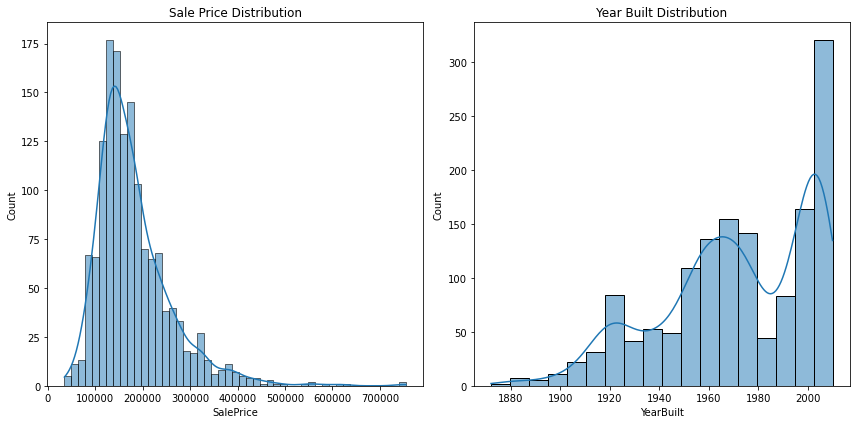

In [92]:
# Create histograms for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train['YearBuilt'], kde=True)
plt.title('Year Built Distribution')

plt.tight_layout()
plt.show()


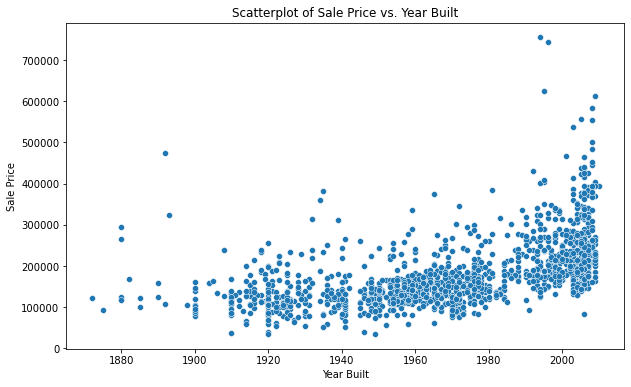

In [93]:
# Scatterplot of SalePrice vs. LotArea
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train)

# Add labels and title
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Year Built')
plt.show()

In [94]:
# Calculate the Pearson correlation coefficient between "Sale Price" and "Lot Area"
correlation = train['SalePrice'].corr(train['YearBuilt'])
correlation

0.5228973328794969

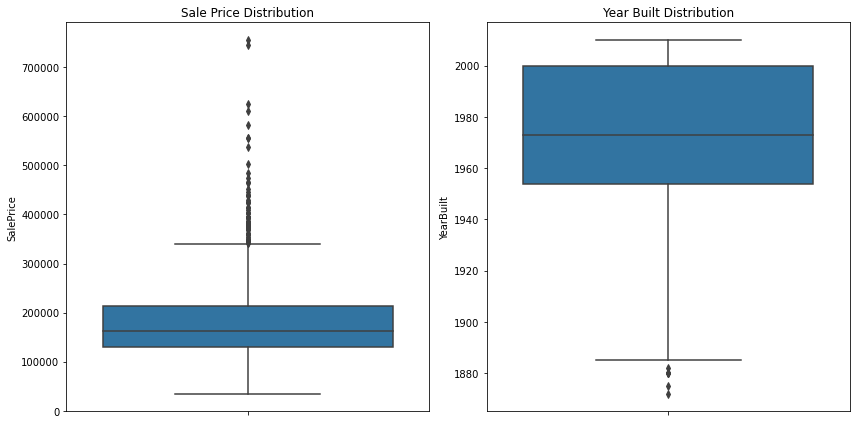

In [95]:
# Box plots for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['YearBuilt'])
plt.title('Year Built Distribution')

plt.tight_layout()
plt.show()

## Analysis of the distribution and relationship between Price Sales and Year Built

* **Year Built Histogram (Left Skewed):**

The left-skewed histogram for "YearBuilt" indicates that the majority of properties in the dataset were constructed more recently, with fewer properties having earlier construction dates.
This means that there is a concentration of properties with relatively newer construction dates and a tail extending to the left with fewer older properties.
Correlation Coefficient (0.523):

* **The Pearson correlation coefficient of 0.523**

Suggests a moderately strong positive linear relationship between "SalePrice" and "YearBuilt."
A positive correlation coefficient indicates that, in general, as the year of construction increases (properties are newer), the sale price tends to be higher.
The positive correlation coefficient aligns with the left-skewed histogram, as the majority of higher-priced properties are relatively more recently constructed.

* **Year Built Whisker Plot (Left Skewed with Outliers to the Left):**

The left-skewed whisker plot and the presence of outliers to the left confirm the left-skewed nature of the "YearBuilt" variable.
The outliers to the left suggest the existence of older properties with either very high or very low sale prices compared to the majority of properties in the dataset.

## 3) Analysis of the relationship between Sale Price and Ground Living Area

In [96]:
# Summary statistics for Sale Price and Year Built
summary_stats = train[['SalePrice', 'GrLivArea']].describe()
summary_stats

,SalePrice,GrLivArea
count,1460.000000,1460.000000
mean,180921.195890,1515.463699
std,79442.502883,525.480383
min,34900.000000,334.000000
25%,129975.000000,1129.500000
50%,163000.000000,1464.000000
75%,214000.000000,1776.750000
max,755000.000000,5642.000000


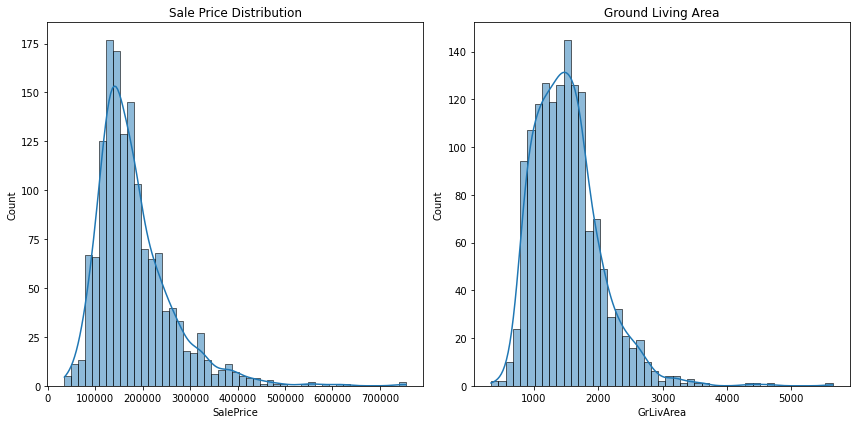

In [97]:
# Create histograms for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train['GrLivArea'], kde=True)
plt.title('Ground Living Area')

plt.tight_layout()
plt.show()

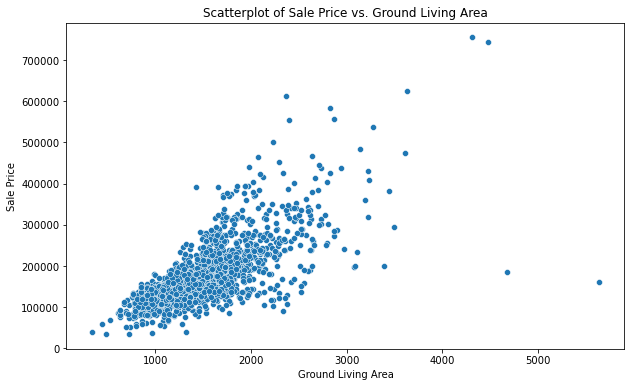

In [98]:
# Scatterplot of SalePrice vs. LotArea
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

# Add labels and title
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Ground Living Area')
plt.show()

In [99]:
# Calculate the Pearson correlation coefficient between "Sale Price" and "Lot Area"
correlation = train['SalePrice'].corr(train['GrLivArea'])
correlation

0.708624477612652

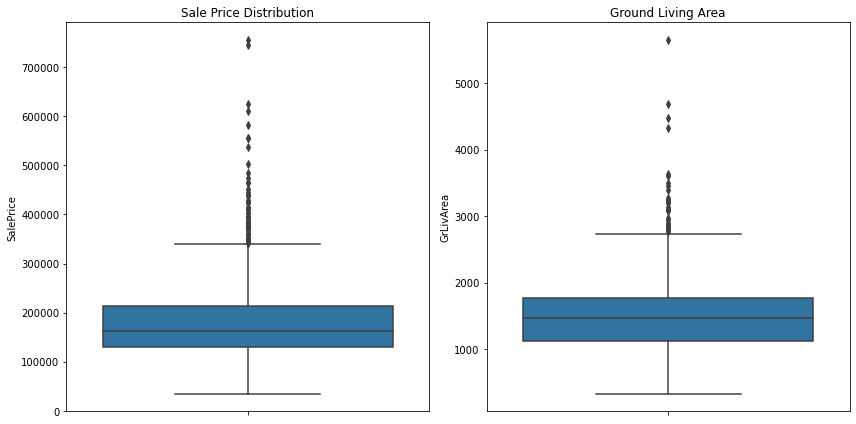

In [100]:
# Box plots for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['GrLivArea'])
plt.title('Ground Living Area')

plt.tight_layout()
plt.show()

## Analysis of the distribution and relationship between Price Sales and Ground Living Area

* **Ground Living Area Histogram (Slightly Right Skewed):**

The slightly right-skewed histogram for "GrLivArea" indicates that the majority of properties have ground living areas concentrated towards the lower end, with a tail extending to the right for larger living areas.
This suggests that most properties have relatively smaller ground living areas, with some properties having significantly larger living spaces.

* **Correlation Coefficient (0.708):**

The Pearson correlation coefficient of 0.708 indicates a relatively strong positive linear relationship between "SalePrice" and "GrLivArea."
A positive correlation coefficient implies that, on average, as the ground living area increases, the sale price tends to be higher.
The strong positive correlation aligns with the slightly right-skewed histogram, as the majority of higher-priced properties tend to have larger living areas.

* **Ground Living Area Whisker Plot (Slightly Right Skewed with Outliers to the Right):**

The slightly right-skewed whisker plot and the presence of outliers to the right confirm the slightly right-skewed nature of the "GrLivArea" variable.
The outliers to the right suggest the existence of properties with very large ground living areas, which contribute to the right skewness.

## 4) Analysis of the relationship between Sale Price and Garage Area

In [101]:
# Summary statistics for Sale Price and Year Built
summary_stats = train[['SalePrice', 'GarageArea']].describe()
summary_stats

,SalePrice,GarageArea
count,1460.000000,1460.000000
mean,180921.195890,472.980137
std,79442.502883,213.804841
min,34900.000000,0.000000
25%,129975.000000,334.500000
50%,163000.000000,480.000000
75%,214000.000000,576.000000
max,755000.000000,1418.000000


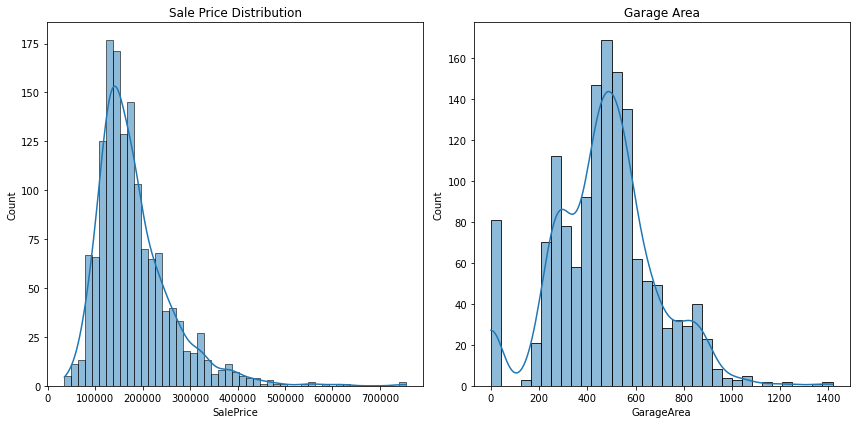

In [102]:
# Create histograms for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train['GarageArea'], kde=True)
plt.title('Garage Area')

plt.tight_layout()
plt.show()

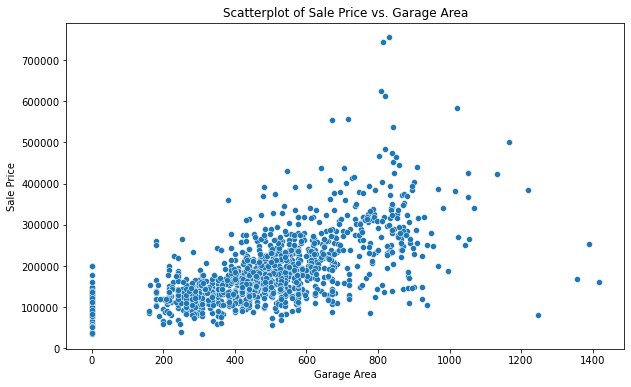

In [103]:
# Scatterplot of SalePrice vs. LotArea
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='GarageArea', y='SalePrice', data=train)

# Add labels and title
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Garage Area')
plt.show()

In [104]:
# Calculate the Pearson correlation coefficient between "Sale Price" and "Lot Area"
correlation = train['SalePrice'].corr(train['GarageArea'])
correlation

0.623431438918362

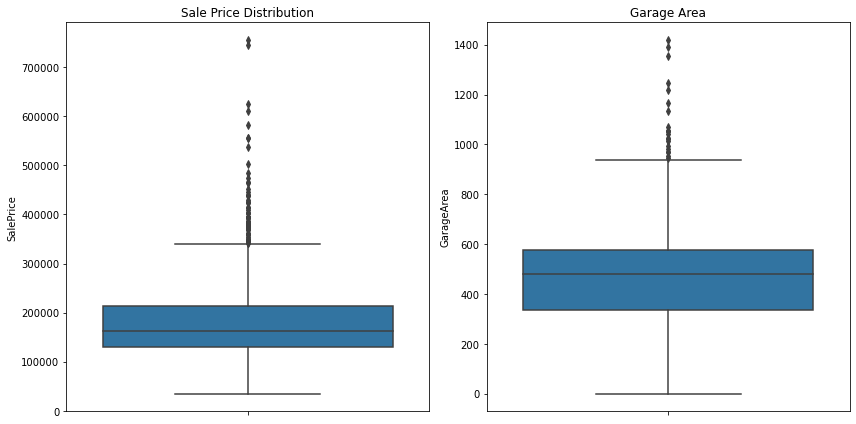

In [105]:
# Box plots for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['GarageArea'])
plt.title('Garage Area')

plt.tight_layout()
plt.show()

## Analysis of the distribution and relationship between Price Sales and Garage

* **Garage Area Histogram (Right Skewed):**

The right-skewed histogram for "GarageArea" indicates that the majority of properties have garage areas concentrated towards the lower end, with a tail extending to the right for larger garage areas.
This suggests that most properties have relatively smaller garage areas, with some properties having significantly larger garage spaces.

* **Correlation Coefficient (0.623):**

The Pearson correlation coefficient of 0.623 indicates a moderately strong positive linear relationship between "SalePrice" and "GarageArea."
A positive correlation coefficient implies that, on average, as the garage area increases, the sale price tends to be higher.
The moderately strong positive correlation aligns with the right-skewed histogram, as the majority of higher-priced properties tend to have larger garage areas.

* **Garage Area Whisker Plot (Right Skewed with Several Outliers to the Right):**

The right-skewed whisker plot and the presence of outliers to the right confirm the right-skewed nature of the "GarageArea" variable.
The outliers to the right suggest the existence of properties with very large garage areas, which contribute to the right skewness.

## 5) Analysis of the relationship between Sale Price and Total Basement Area

In [106]:
# Summary statistics for Sale Price and Year Built
summary_stats = train[['SalePrice', 'TotalBsmtSF']].describe()
summary_stats

,SalePrice,TotalBsmtSF
count,1460.000000,1460.000000
mean,180921.195890,1057.429452
std,79442.502883,438.705324
min,34900.000000,0.000000
25%,129975.000000,795.750000
50%,163000.000000,991.500000
75%,214000.000000,1298.250000
max,755000.000000,6110.000000


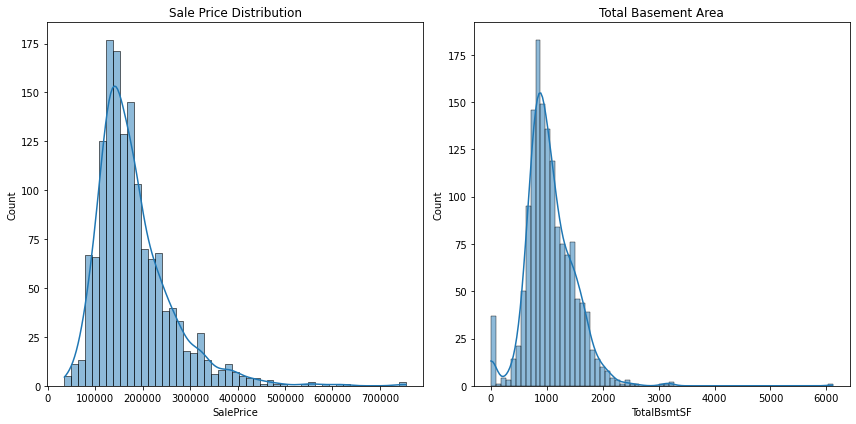

In [107]:
# Create histograms for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.histplot(train['TotalBsmtSF'], kde=True)
plt.title('Total Basement Area')

plt.tight_layout()
plt.show()

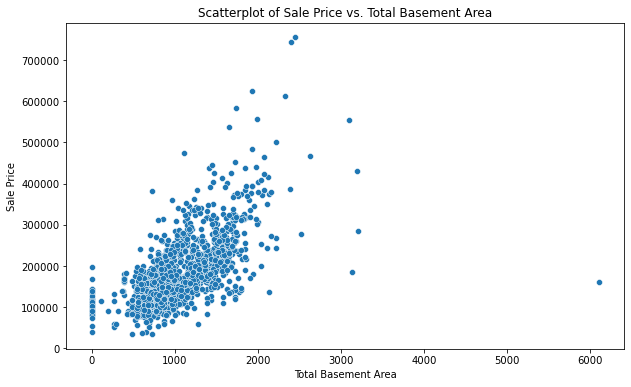

In [108]:
# Scatterplot of SalePrice vs. LotArea
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train)

# Add labels and title
plt.xlabel('Total Basement Area')
plt.ylabel('Sale Price')
plt.title('Scatterplot of Sale Price vs. Total Basement Area')
plt.show()

In [109]:
# Calculate the Pearson correlation coefficient between "Sale Price" and "Lot Area"
correlation = train['SalePrice'].corr(train['TotalBsmtSF'])
correlation

0.6135805515591956

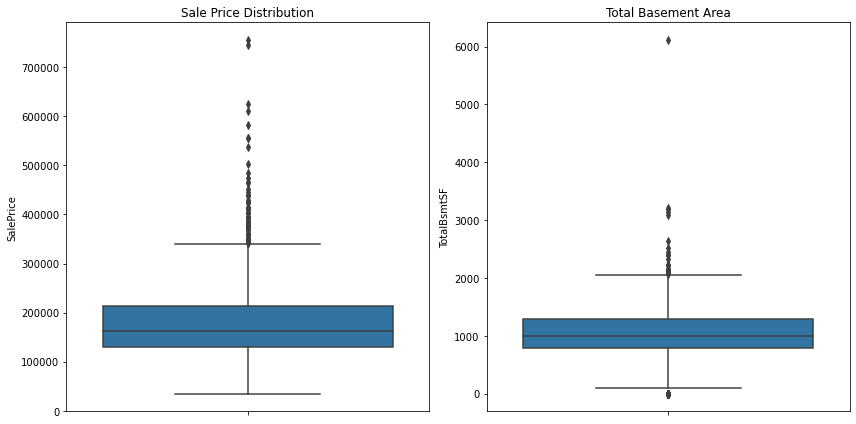

In [110]:
# Box plots for Sale Price and Lot Area
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=train['SalePrice'])
plt.title('Sale Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=train['TotalBsmtSF'])
plt.title('Total Basement Area')

plt.tight_layout()
plt.show()

## Analysis of the distribution and relationship between Price Sales and Total Basement Area

* **Total Basement Area Histogram (Slightly Right Skewed):**

The slightly right-skewed histogram for "TotalBsmtSF" indicates that the majority of properties have total basement areas concentrated towards the lower end, with a tail extending to the right for larger basement areas.
This suggests that most properties have relatively smaller basement areas, with some properties having significantly larger basement spaces.
Correlation Coefficient (0.613):

* **The Pearson correlation coefficient of 0.613**

Suggests a moderately strong positive linear relationship between "SalePrice" and "TotalBsmtSF."
A positive correlation coefficient implies that, on average, as the total basement area increases, the sale price tends to be higher.
The moderately strong positive correlation aligns with the slightly right-skewed histogram, as the majority of higher-priced properties tend to have larger basement areas.

* **Total Basement Area Whisker Plot (Slightly Right Skewed with Outliers):**

The slightly right-skewed whisker plot and the presence of some outliers to the right and a few to the left confirm the slightly right-skewed nature of the "TotalBsmtSF" variable.
The outliers to the right suggest the existence of properties with very large basement areas, which contribute to the right skewness. The presence of outliers to the left may represent properties with smaller basement areas compared to the majority.